# Model variability analysis

In this notebook we take the results of the different variability checks and plot them

In [2]:
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as st
import sys
# sys.path.append("C:/Users/jordi/Documents/GitHub/policy-data-analyzer/tasks/")
sys.path.append("/home/propietari/Documents/GitHub/policy-data-analyzer/tasks/")
from data_loading.src.utils import *
from matplotlib import animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D


In [14]:
def hist_bins(np_array):
    #compute the optimal number of bins for a histogram based on Freedman–Diaconis rule
    q25, q75 = np.percentile(np_array,[.25,.75])
    bin_width = 2*(q75 - q25)*len(np_array)**(-1/3)
    bins = round((np_array.max() - np_array.min())/bin_width)
    return bins

def build_chart_title(string):
    try:
        perc = string.split("_")[2].split("=")[1]
        epoch = string.split("_")[3]
        if epoch == "9":
            epoch = "10"
        if "36" in perc:
            perc = perc.replace("36", "25")
        if "stsb" in string:
            return "stsb/" + perc + "/" + epoch
        else:
            return "Paraphrase/" + perc + "/" + epoch
    except:
        return(string)
    
def plot_array(array, title):
    plt.hist(array, density=True, bins=20)
    mn, mx = plt.xlim()
    plt.xlim(mn, mx)
    kde_xs = np.linspace(mn, mx, 300)
    kde = st.gaussian_kde(array)
    plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
    plt.tight_layout()
    plt.annotate(f"mean: {round(np.mean(array), 3)}", xy=(0.02, 0.95), xycoords='axes fraction')
    plt.annotate(f"std: {round(np.std(array), 3)}", xy=(0.02, 0.90), xycoords='axes fraction')
    plt.annotate(f"max: {round(np.max(array), 3)}", xy=(0.02, 0.85), xycoords='axes fraction')
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('F1')

## Base variability

In here, we performed the fine-tuning over the three hyper-parameters we have been working with, validation set percentage, model and epoch. For each combination of the set of parameters we make 60 replicas.

The results were saved in a json file. Thus, we first process the results file and then we plot the histograms of the results for each condition.

In [1]:
# Use this path when results are saved in different files

path = "../input/Base_variability"
files = list_files_from_dir(path)

final_dict = {}

for file in files:
    new_dict = load_json(path + "/" + file)
    for test_perc in new_dict:
        for iteration in new_dict[test_perc]:
            for model in new_dict[test_perc][iteration]:
                for epoch, value in new_dict[test_perc][iteration][model].items():
                    if epoch == "10":
                        epoch = "9"
                    test = test_perc.replace("25", "36")
                    key = model + "_" + test + "_" + epoch
#                     final_list.append([key, value[0]["avg_f1"][1]])
                    if key in final_dict:
                        final_dict[key].append(round(value[0]["avg_f1"][1], 3))
                    else:
                        final_dict[key] = []
                        final_dict[key].append(round(value[0]["avg_f1"][1], 3))
                    

                    

NameError: name 'list_files_from_dir' is not defined

In [12]:
# Use this path when results are saved in a single file
path = "../input/Random_forest_analysis"
files = list_files_from_dir(path)

final_dict = {}

for file in files:
    new_dict = load_json(path + "/" + file)
#     print(new_dict)
    for wup in new_dict:
        for val in new_dict[wup]:
            key = wup + "_" + val
#             print(new_dict[wup]["validation"])
            for result in new_dict[wup][val]:
                if key in final_dict:
                    final_dict[key].append(round(result[1], 3))
                else:
                    final_dict[key] = []
                    final_dict[key].append(round(result[1], 3))
print(final_dict)

{'warmup0.01_validation': [0.878, 0.866, 0.861, 0.878, 0.868, 0.855, 0.851, 0.878, 0.866, 0.87], 'warmup0.01_test': [0.896, 0.889, 0.887, 0.886, 0.891, 0.886, 0.886, 0.898, 0.892, 0.898], 'warmup0.01_test_clf1': [0.896, 0.889, 0.887, 0.886, 0.891, 0.886, 0.886, 0.898, 0.892, 0.898], 'warmup0.04_validation': [0.864, 0.864, 0.861, 0.883, 0.874, 0.855, 0.857, 0.857, 0.868, 0.881], 'warmup0.04_test': [0.894, 0.892, 0.892, 0.881, 0.886, 0.875, 0.889, 0.892, 0.887, 0.894], 'warmup0.04_test_clf1': [0.894, 0.892, 0.892, 0.881, 0.886, 0.875, 0.889, 0.892, 0.887, 0.894], 'warmup0.07_validation': [0.846, 0.883, 0.885, 0.881, 0.878, 0.868, 0.87, 0.861, 0.859, 0.857], 'warmup0.07_test': [0.899, 0.896, 0.891, 0.899, 0.892, 0.896, 0.886, 0.896, 0.887, 0.886], 'warmup0.07_test_clf1': [0.899, 0.896, 0.891, 0.899, 0.892, 0.896, 0.886, 0.896, 0.887, 0.886], 'warmup0.1_validation': [0.868, 0.876, 0.855, 0.857, 0.868, 0.868, 0.885, 0.87, 0.84, 0.866], 'warmup0.1_test': [0.882, 0.887, 0.884, 0.887, 0.887, 0

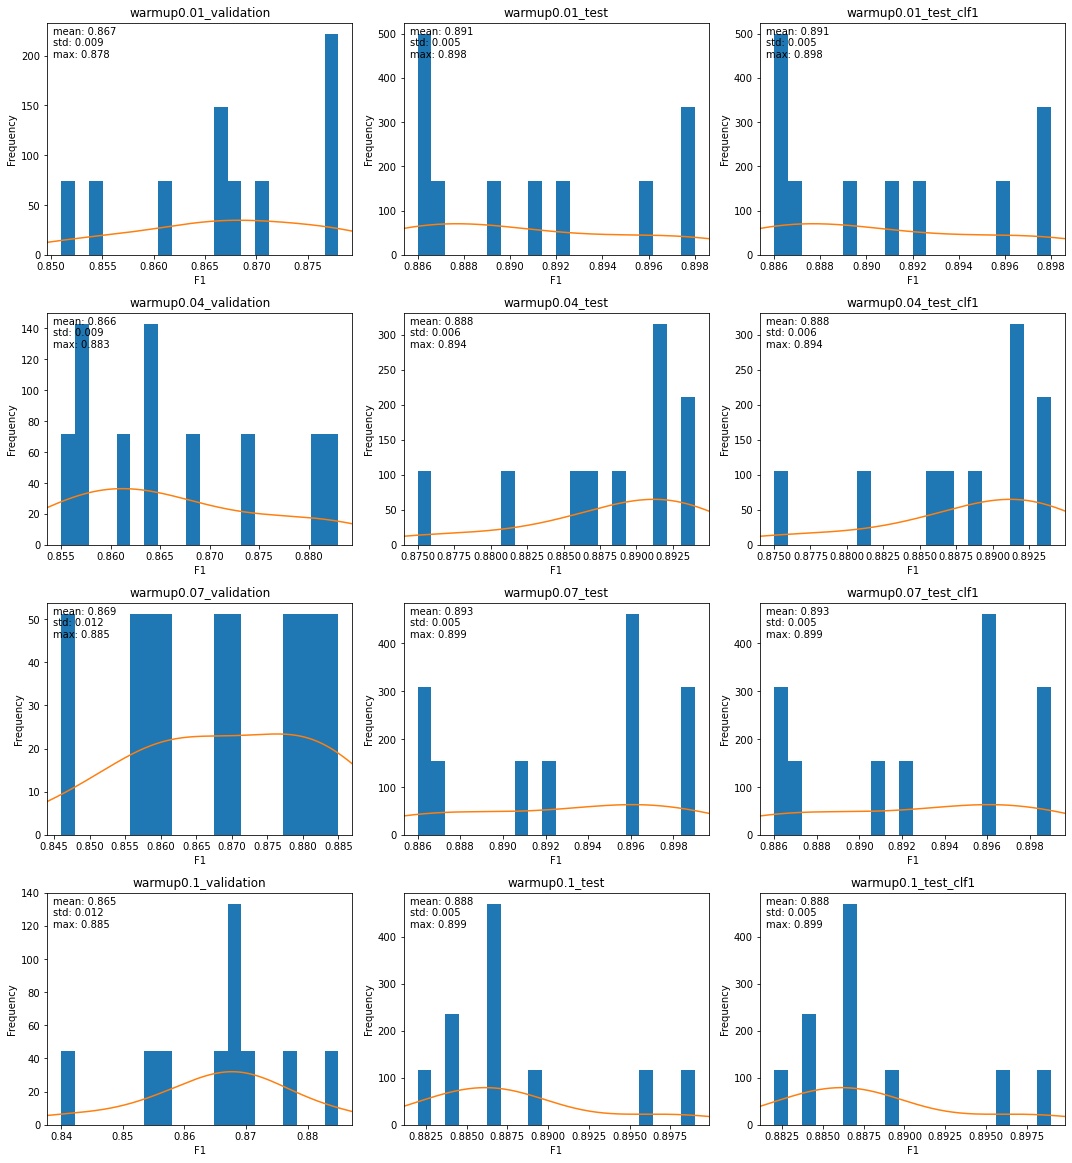

In [20]:
i = 0
k = 0
l = 0
j = 0 
n = 0
f = plt.figure(figsize=(15, 40))

for item, value in final_dict.items():
    array = np.array(value)
    j +=1
    plt.subplot(10, 3, j)
    plot_array(array, build_chart_title(item))
    
f.savefig("../output/stochasticity.pdf", bbox_inches='tight')


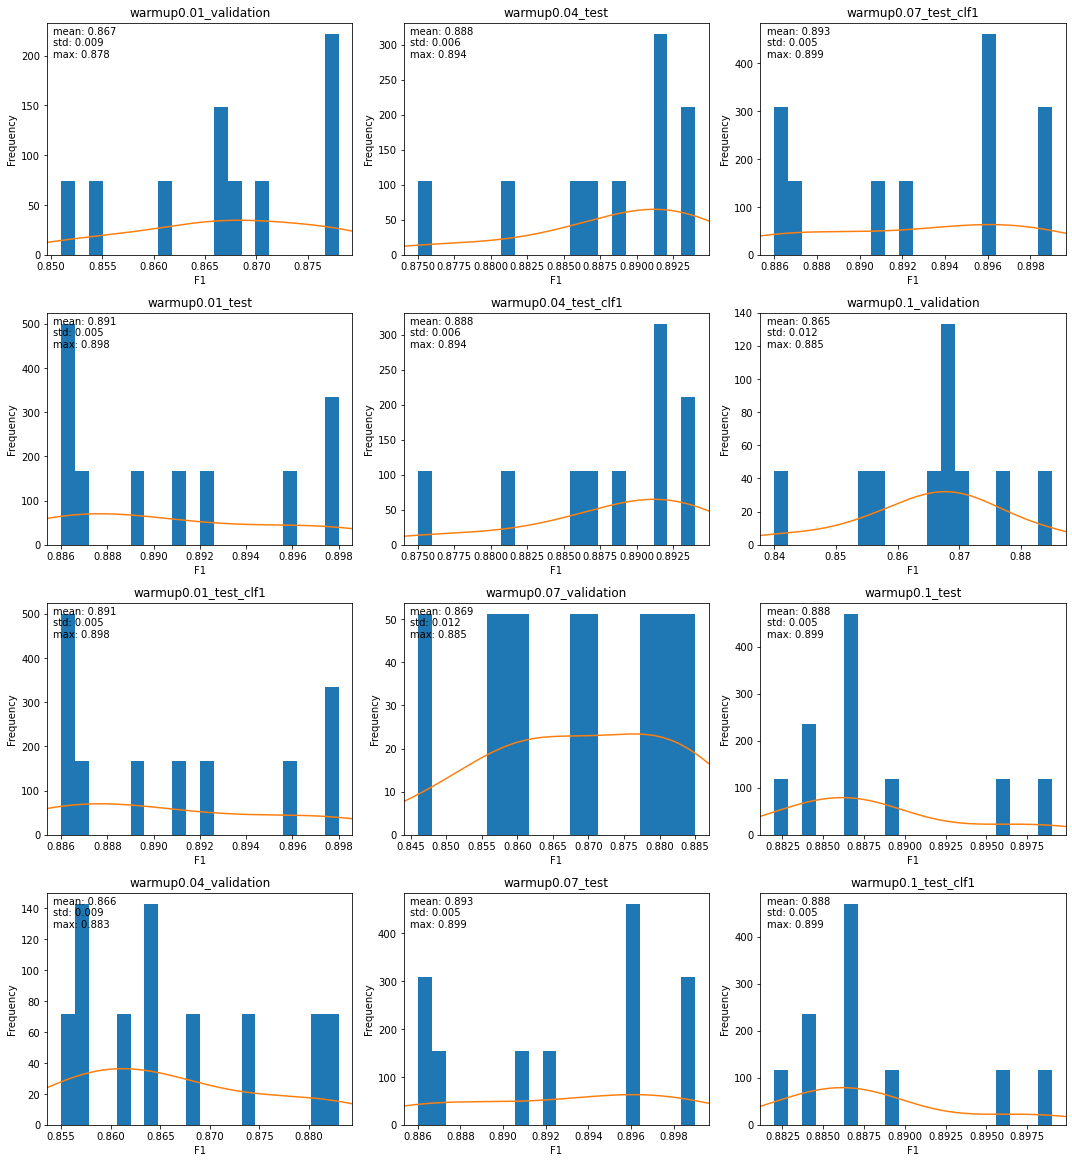

In [17]:
i = 0
k = 0
l = 0
j = 1 
n = 0
f = plt.figure(figsize=(15, 40))

for item, value in sorted(final_dict.items()):
    
    array = np.array(value)
    if i % 5 != 0:
        j = j + 4
    else:
        j = 1 + l + n
        l += 1
    i += 1
    if i % 20 == 0:
        k += 1
        n = 16
        i = 0
        j = 20 * k
        

    plt.subplot(10, 4, j)
    plot_array(array, build_chart_title(item))
    
f.savefig("../output/stochasticity.pdf", bbox_inches='tight')


# Fixing the number of epochs at 20

In this experiment we use the following conditions:

* Validation set percentage 0.2
* Paraphrase model
* Number of epochs 20

Then we perform 100 replicas of the same condition and we save them in two csv files:
* EXP17_test_per_0.2_epochs_20_replicas_1.csv
* EXP17_test_per_0.2_epochs_20_replicas_2.csv

we splitted them the experiment in two files as we run two different colab batches for safety

In [60]:
path = "../input/Epochs_20"
files = list_files_from_dir(path)

final_list = []
for file in files:
    print(file)
    with open(path + "/" + file) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            final_list.append(float(row[1]))

EXP17_test_per_0.2_epochs_20_replicas_2.csv


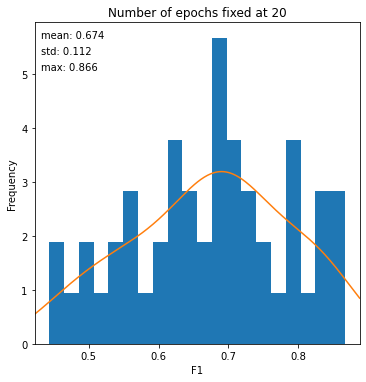

In [61]:
array = np.array(final_list)
f = plt.figure(figsize=(5, 5))
plot_array(array, "Number of epochs fixed at 20")
f.savefig("../output/epochs_20.pdf", bbox_inches='tight')


In [46]:
array

array([0.75374397, 0.56871413, 0.65133045, 0.63246146, 0.48660278,
       0.64437124, 0.85239942, 0.69138156, 0.44383786, 0.8183609 ,
       0.73239998, 0.73603053, 0.71280908, 0.69215991, 0.78947586,
       0.44802374, 0.82433385, 0.78207378, 0.50211449, 0.5218149 ,
       0.52904102, 0.62276948, 0.76660881, 0.64697497, 0.55637951,
       0.48237243, 0.70743953, 0.78846725, 0.8331778 , 0.71376876,
       0.62381543, 0.79897361, 0.69354332, 0.86648837, 0.72147897,
       0.67176172, 0.69023405, 0.63359129, 0.68390197, 0.59614851,
       0.85461353, 0.70494861, 0.53828925, 0.84141746, 0.59705818,
       0.74150463, 0.57797815, 0.56222773, 0.67976988, 0.66859171,
       0.70426887, 0.59836296, 0.72428278, 0.68900327, 0.61284756,
       0.6290669 , 0.62874441, 0.64828798, 0.69982178, 0.50606749,
       0.61424406, 0.5006874 , 0.55645593, 0.69789138, 0.47281313,
       0.70486763, 0.54983195, 0.45588778, 0.68147242, 0.7429594 ,
       0.58167969, 0.58898645, 0.85661348, 0.71364918, 0.70234

# Fixing the warm up function

In this experiment we use the following conditions:

* Validation set percentage 0.2
* Paraphrase model
* Number of epochs 20
* Fix the warm up function

Then we perform 100 replicas of the same condition and we save them in two csv files:
* EXP17_test_per_0.2_epochs_20_replicas_3.csv
* EXP17_test_per_0.2_epochs_20_replicas_4.csv

we splitted them the experiment in two files as we run two different colab batches for safety

In [62]:
path = "../input/Linear_warmup"
files = list_files_from_dir(path)

final_list = []

for file in files:
    print(file)
    with open(path + "/" + file) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            final_list.append(float(row[1]))

EXP17_test_per_0.2_epochs_20_replicas_3.csv


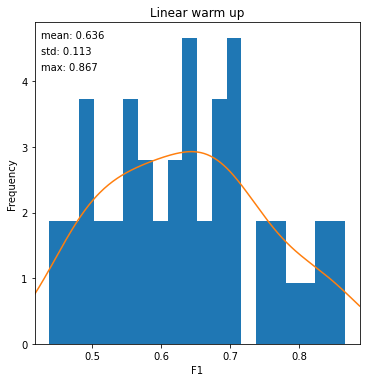

In [63]:
array = np.array(final_list)
f = plt.figure(figsize=(5, 5))
plot_array(array, "Linear warm up")
f.savefig("../output/linear_warm_up.pdf", bbox_inches='tight')

# Fixing the warm up function with 10 epochs

In this experiment we use the following conditions:

* Validation set percentage 0.2
* Paraphrase model
* Number of epochs 10
* Fix the warm up function

Then we perform 100 replicas of the same condition and we save them in a csv file:
* EXP17_test_per_0.2_epochs_10_replicas_5.csv

we splitted them the experiment in two files as we run two different colab batches for safety

In [66]:
path = "../input/Linear_warmup_epochs10"
files = list_files_from_dir(path)

final_list = []

for file in files:
    print(file)
    with open(path + "/" + file) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            final_list.append(float(row[1]))

EXP17_test_per_0.2_epochs_10_replicas_5.csv


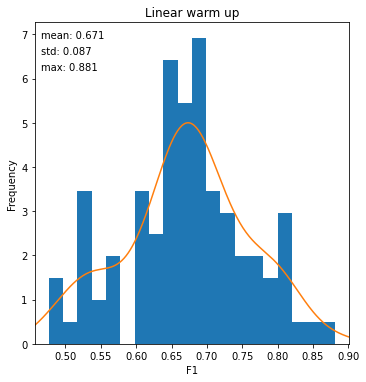

In [67]:
array = np.array(final_list)
f = plt.figure(figsize=(5, 5))
plot_array(array, "Linear warm up")
f.savefig("../output/linear_warm_up_epochs_10.pdf", bbox_inches='tight')

# Warm up with 10% training set with 10 epochs

In this experiment we use the following conditions:

* Validation set percentage 0.2
* Paraphrase model
* Number of epochs 10
* Warm up is 10% of training

Then we perform 100 replicas of the same condition and we save them in a csv file:
* EXP17_test_per_0.2_epochs_10_replicas_6.csv

we splitted them the experiment in two files as we run two different colab batches for safety

In [68]:
path = "../input/Linear_warm_up10%_epochs_10"
files = list_files_from_dir(path)

final_list = []

for file in files:
    print(file)
    with open(path + "/" + file) as f:
        csv_reader = csv.reader(f)
        for row in csv_reader:
            final_list.append(float(row[1]))

EXP17_test_per_0.2_epochs_10_replicas_6.csv


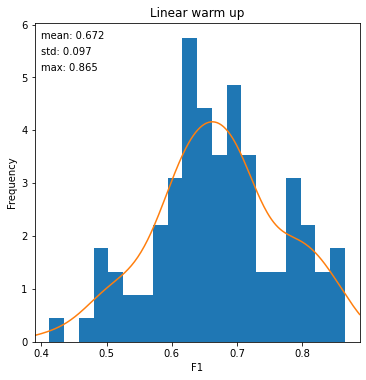

In [69]:
array = np.array(final_list)
f = plt.figure(figsize=(5, 5))
plot_array(array, "Linear warm up")
f.savefig("../output/linear_warm_up_epochs_10.pdf", bbox_inches='tight')

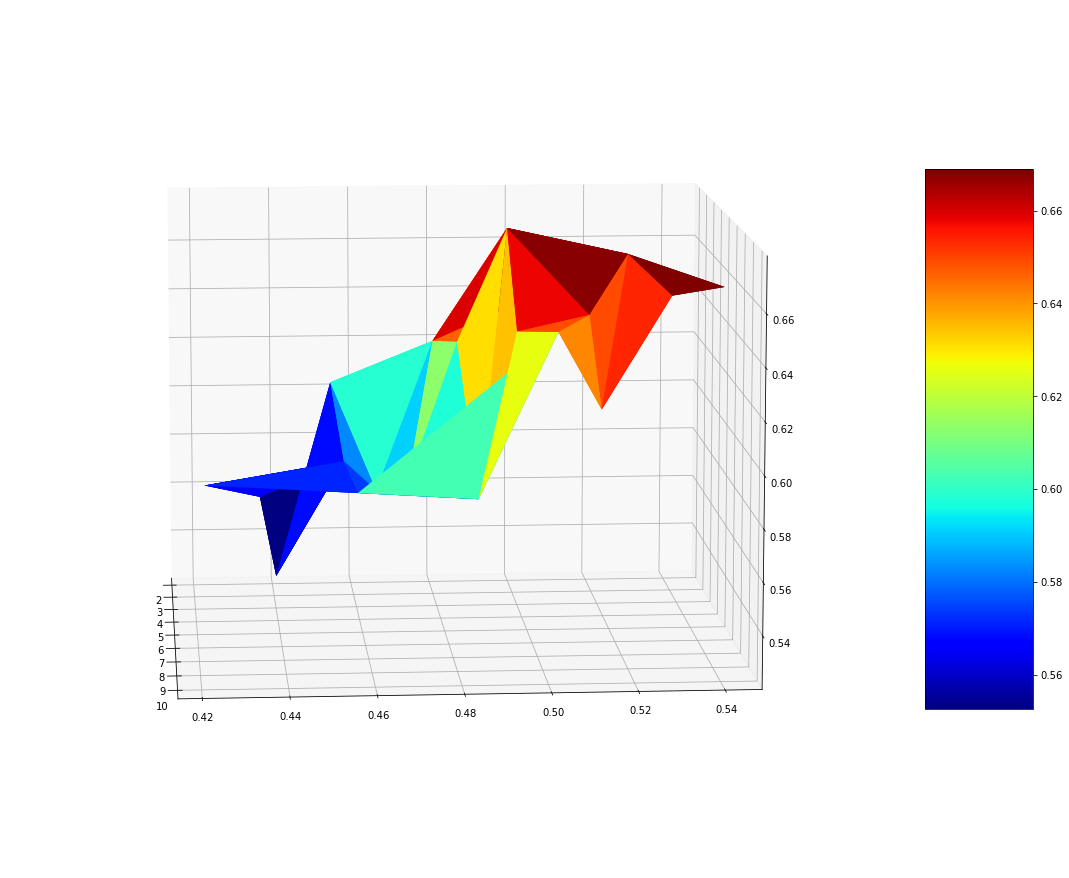

In [181]:

stsb = np.array(stsb_list)
X = stsb[:, 1]
Y = stsb[:, 2]
Z = stsb[:, 3]

fig = plt.figure(figsize=(15, 15))
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

def init():
    # Plot the surface.
    ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
#     fig.colorbar(surf, shrink=0.5, aspect=5)
    return fig,

def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
ani.save('../output/stsb.mp4',writer='ffmpeg',fps=1000/100)


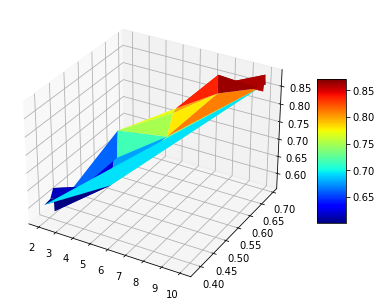

In [174]:

paraphrase = np.array(paraphrase_list)
X = paraphrase[:, 1]
Y = paraphrase[:, 2]
Z = paraphrase[:, 3]

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_trisurf(X, Y, Z, cmap=cm.jet, linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

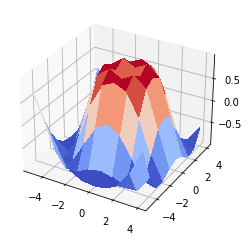

In [150]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 1)
Y = np.arange(-5, 5, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

In [151]:
Z

array([[ 0.70886129,  0.11965158, -0.43697552, -0.7820949 , -0.92618484,
        -0.95892427, -0.92618484, -0.7820949 , -0.43697552,  0.11965158],
       [ 0.11965158, -0.58617619, -0.95892427, -0.9712778 , -0.83133918,
        -0.7568025 , -0.83133918, -0.9712778 , -0.95892427, -0.58617619],
       [-0.43697552, -0.95892427, -0.89168225, -0.44749175, -0.02068353,
         0.14112001, -0.02068353, -0.44749175, -0.89168225, -0.95892427],
       [-0.7820949 , -0.9712778 , -0.44749175,  0.30807174,  0.78674913,
         0.90929743,  0.78674913,  0.30807174, -0.44749175, -0.9712778 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913, -0.02068353, -0.83133918],
       [-0.95892427, -0.7568025 ,  0.14112001,  0.90929743,  0.84147098,
         0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.92618484, -0.83133918, -0.02068353,  0.78674913,  0.98776595,
         0.84147098,  0.98776595,  0.78674913